## Importing the necessary libraries

In [1]:
import numpy as np
import csv
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MMS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MMS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load the data
`Giving the path of the dataset to read the data from the file.
This will open the csv file and the data will be stored in the sample_data list.`

In [2]:
filename = "D://Kaggle//IMDB dataset//IMDB Dataset.csv"
sample_data = []
file = open(filename, encoding="utf8")
csv_reader = csv.reader(file)
for row in csv_reader:
    sample_data.append(row)
file.close()

## Seperating the data into X and Y values
`The data is stored in the sample_data list. The first element of the list is the column names.
The first column is the review and the second column is the sentiment.`

In [3]:
X_Values = []
Y_Values = []

In [4]:
for i in range(1, len(sample_data)):
    X_Values.append(sample_data[i][0])
    Y_Values.append(sample_data[i][1])

## Converting the Y values to binary form
`The Y values are in the form of positive and negative. We need to convert them to 0 and 1.`

In [5]:
# convert the Y_Values to 0 and 1
for i in range(len(Y_Values)):
    if Y_Values[i] == "positive":
        Y_Values[i] = 1
    else:
        Y_Values[i] = 0

## Converting the X and Y values to numpy arrays
`The X and Y values are in the form of lists. We need to convert them to numpy arrays.`

In [7]:
# convert both arrays to numpy arrays
X_Values = np.array(X_Values)
Y_Values = np.array(Y_Values)

MemoryError: Unable to allocate 2.55 GiB for an array with shape (50000,) and data type <U13704

## Data Preprocessing
`The data is in the form of text and has been scrapped so it may contain unwanted html tags, special characters, etc.
So, we need to preprocess the data before feeding it to the model.`

1.  Using a Regrex to remove the unwanted characters by replacing them with a space. Each HTML tag contains a '<' and a '>'. So, we can remove them by replacing them with a space.
2. We can also remove the special characters by replacing them with a space.
3. We can also convert the text to lowercase.
4. We can also remove the extra spaces.

In [ ]:
# Removing the unwanted Tags.
X_Values = np.array([re.sub('<.*?>', ' ', data) for data in X_Values])
# Removing the special characters.
X_Values = np.array([re.sub('[^a-zA-Z0-9\s]', ' ', data) for data in X_Values])
# Converting the text to lowercase.
X_Values = np.array([data.lower() for data in X_Values])
# Removing the extra spaces.
X_Values = np.array([' '.join(data.split()) for data in X_Values])
# applying lemmatization
X_Values = np.array([lemmatizer.lemmatize(data) for data in X_Values])
#Removing stopwords
X_Values = np.array([data for data in X_Values if data not in stop_words])


In [56]:
# Printing the first 5 X values.
for i in range(5):
    print(X_Values[i])

one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldn t dare forget pretty 

In [57]:
# Storing the Pure text data in a variable.
Pure_text = X_Values

## Model Training
1. Logistic Regression
2. SVM
3. Naive Bayes

In [58]:
model_scores = {}

In [59]:
# Splitting the data into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X_Values, Y_Values, test_size=0.2, random_state=0)

In [60]:
# Using CountVectorizer to convert the text data into numerical data.
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Using Logistic Regression to train the model.
model = LogisticRegression()
model.fit(X_train, y_train)
print("Logistic Regression Model Score: ", model.score(X_test, y_test))
model_scores["Logistic Regression"] = model.score(X_test, y_test)

y_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

Logistic Regression Model Score:  0.8854
Accuracy:  0.8854
Precision:  0.8815184815184816
Recall:  0.8886203423967775
F1 Score:  0.8850551654964894
Confusion Matrix:  [[4442  593]
 [ 553 4412]]


C:\Users\Hp\Desktop\PCN\Seniment Analysis\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
# Using Naive Bayes to train the model.
model = MultinomialNB()
model.fit(X_train, y_train)
print("Naive Bayes Model Score: ", model.score(X_test, y_test))
model_scores["Naive Bayes"] = model.score(X_test, y_test)

y_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

Naive Bayes Model Score:  0.8436
Accuracy:  0.8436
Precision:  0.8667241751132198
Recall:  0.8094662638469285
F1 Score:  0.8371172672359926
Confusion Matrix:  [[4417  618]
 [ 946 4019]]


In [62]:
# Using SVM to train the model.
# model = SVC()
# running for 10 epoch
model = SVC(kernel='linear', C=1, random_state=0, max_iter=5000)
model.fit(X_train, y_train)
print("SVM Model Score: ", model.score(X_test, y_test))
model_scores["SVM"] = model.score(X_test, y_test)

y_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

C:\Users\Hp\Desktop\PCN\Seniment Analysis\venv\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM Model Score:  0.6296
Accuracy:  0.6296
Precision:  0.5958352333181335
Recall:  0.7895266868076536
F1 Score:  0.6791406791406791
Confusion Matrix:  [[2376 2659]
 [1045 3920]]


## Plotting Graph of the model scores

Text(0.5, 1.0, 'Model Scores of different models')

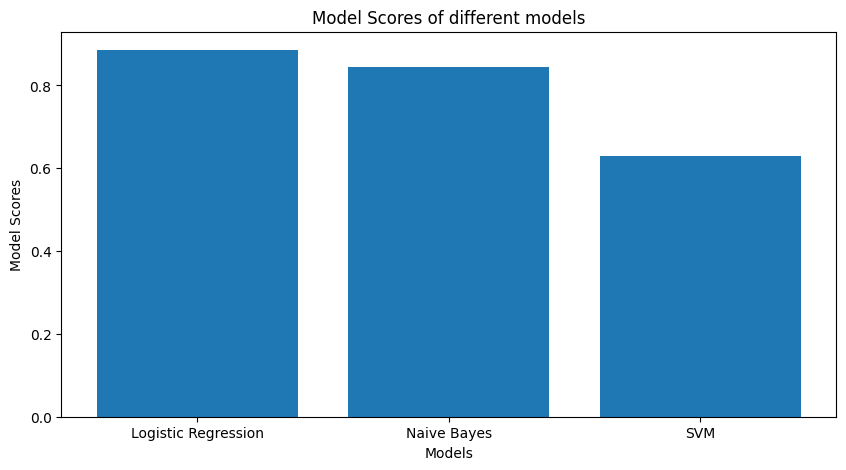

In [63]:
# Plotting the graph of the model scores.
plt.figure(figsize=(10, 5))
plt.bar(model_scores.keys(), model_scores.values())
plt.ylabel("Model Scores")
plt.xlabel("Models")
plt.title("Model Scores of different models")